****
****Business Case Study****
****

Importing the data and see the outcomes of the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

sales_df =pd.read_csv('https://raw.githubusercontent.com/chrisdmell/Project_DataScience/working_branch/09_gojek/sales_data_all.csv')

print("Shape of the df")
display(sales_df.shape)

print("HEAD")
display(sales_df.head())

print("NULL CHECK")
display(sales_df.isnull().any().sum())

print("NULL CHECK")
display(sales_df.isnull().sum())

print("df INFO")
display(sales_df.info())

print("DESCRIBE")
display(sales_df.describe())

Shape of the df


(3210, 5)

HEAD


,date,num_orders,order_status,total_cbv,service
0,2016-01-01,180,Cancelled,76076000,GO-BOX
1,2016-01-01,10,Cancelled,1960140,GO-CLEAN
2,2016-01-01,28380,Cancelled,489898500,GO-FOOD
3,2016-01-01,0,Cancelled,728000,GO-GLAM
4,2016-01-01,10,Cancelled,136500,GO-KILAT


NULL CHECK


0

NULL CHECK


date            0
num_orders      0
order_status    0
total_cbv       0
service         0
dtype: int64

df INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          3210 non-null   object
 1   num_orders    3210 non-null   int64 
 2   order_status  3210 non-null   object
 3   total_cbv     3210 non-null   int64 
 4   service       3210 non-null   object
dtypes: int64(2), object(3)
memory usage: 125.5+ KB


None

DESCRIBE


,num_orders,total_cbv
count,3210.000000,3.210000e+03
mean,16428.841121,3.779779e+08
std,59088.496641,1.271196e+09
min,0.000000,0.000000e+00
25%,20.000000,9.668750e+05
50%,180.000000,1.192054e+07
75%,2870.000000,1.887262e+08
max,468570.000000,1.035899e+10


To make the date time format which makes us easy to work with months

In [ ]:
time_to_pandas_time = ["date"]
for cols in time_to_pandas_time:
    sales_df[cols] = pd.to_datetime(sales_df[cols])
sales_df['Month'] = sales_df['date'].dt.month
Q1_2016_df = sales_df.loc[sales_df['Month'] != 4].copy()
Q1_2016_df.loc[:, 'Month'] = Q1_2016_df['Month'].replace({1: "Jan", 2: "Feb", 3: "Mar"})
print(Q1_2016_df.head())
display(Q1_2016_df['order_status'].unique())
display(Q1_2016_df['service'].unique())


        date  num_orders order_status  total_cbv   service Month
0 2016-01-01         180    Cancelled   76076000    GO-BOX   Jan
1 2016-01-01          10    Cancelled    1960140  GO-CLEAN   Jan
2 2016-01-01       28380    Cancelled  489898500   GO-FOOD   Jan
3 2016-01-01           0    Cancelled     728000   GO-GLAM   Jan
4 2016-01-01          10    Cancelled     136500  GO-KILAT   Jan


array(['Cancelled', 'Completed', 'Failed/Timeout', 'No Driver Found',
       'Other'], dtype=object)

array(['GO-BOX', 'GO-CLEAN', 'GO-FOOD', 'GO-GLAM', 'GO-KILAT', 'GO-MART',
       'GO-MASSAGE', 'GO-RIDE', 'GO-SEND', 'GO-SHOP', 'GO-TIX'],
      dtype=object)

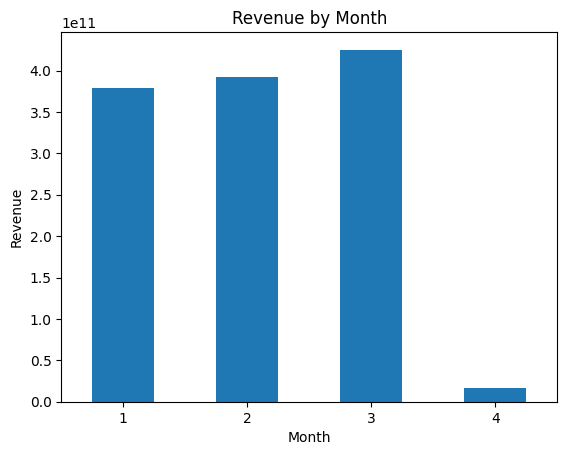

Growth rate in febravaury
Growth Rate for febravaury: 3.72%
Growth rate march
Growth Rate for March: 8.29%


In [ ]:
revenue_by_month = sales_df.groupby('Month')['total_cbv'].sum()
revenue_by_month.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.show()
total_cbv_jan = Q1_2016_df.loc[Q1_2016_df['Month'] == 'Jan', 'total_cbv'].sum()
total_cbv_march = Q1_2016_df.loc[Q1_2016_df['Month'] == 'Mar', 'total_cbv'].sum()
total_cbv_february = Q1_2016_df.loc[Q1_2016_df['Month'] == 'Feb', 'total_cbv'].sum()
print("Growth rate in febravaury")
growth_rate_feb = ((total_cbv_february - total_cbv_jan) / total_cbv_jan) * 100
print(f"Growth Rate for febravaury: {growth_rate_feb:.2f}%")
print("Growth rate march")
growth_rate_march = ((total_cbv_march - total_cbv_february) / total_cbv_february) * 100
print(f"Growth Rate for March: {growth_rate_march:.2f}%")

As we observed there is a 8.29 percent increase from feb to march

Month,1,2,3,4,cummul1,cummul2,cummul3,Jan_Share,Feb_Share,Mar_Share
service,,,,,,,,,,
GO-RIDE,240314858420,270319702380,296226042840,11995414340,240314858420,270319702380,296226042840,56.523082,63.580349,69.673631
GO-FOOD,57742457500,43902658800,44116275294,1477503300,298057315920,314222361180,340342318134,13.581273,10.326093,10.376337
GO-SEND,39319653100,45003635040,49321812540,2170289940,337376969020,359225996220,389664130674,9.248150,10.585047,11.600701
GO-SHOP,23064015520,15067987480,13408951920,464332960,360440984540,374293983700,403073082594,5.424755,3.544055,3.153843


['GO-RIDE', 'GO-FOOD', 'GO-SEND', 'GO-SHOP']


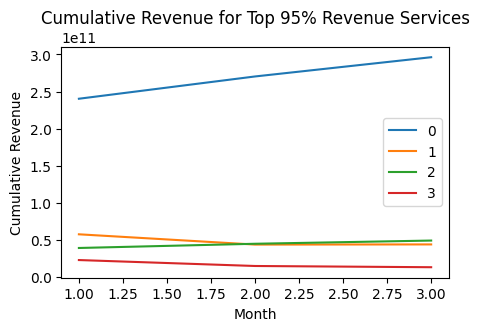

In [ ]:
revenue_total = sales_df.pivot_table(index='service', columns='Month', values='total_cbv', aggfunc='sum')
revenue_total.sort_values(by=1, ascending=False, inplace=True)
revenue_total['cummul1'] = revenue_total[1].cumsum()
revenue_total['cummul2'] = revenue_total[2].cumsum()
revenue_total['cummul3'] = revenue_total[3].cumsum()
total_cumulative_revenue_march = revenue_total['cummul3'].iloc[-1]
top_95_revenue = revenue_total[revenue_total['cummul3'] <= (0.95 * total_cumulative_revenue_march)].copy()
top_95_revenue.loc[:, 'Jan_Share'] = (top_95_revenue[1] / total_cumulative_revenue_march) * 100
top_95_revenue.loc[:, 'Feb_Share'] = (top_95_revenue[2] / total_cumulative_revenue_march) * 100
top_95_revenue.loc[:, 'Mar_Share'] = (top_95_revenue[3] / total_cumulative_revenue_march) * 100
display(top_95_revenue)
ninety_five_perc_gmv = list(top_95_revenue.index)
print(ninety_five_perc_gmv)
top_95_revenue_plot = top_95_revenue[[1, 2, 3]]
top_95_revenue_plot.index = range(len(top_95_revenue_plot))
top_95_revenue_plot.T.plot.line(figsize=(5, 3))
plt.xlabel('Month')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue for Top 95% Revenue Services')
plt.show()

throughout 90% of net revenue is shared by Ride, Food, Send, and Shop throughout the course of the three months.(In January, Ride made up 56% of the net income.).

completed rides


Month,Jan,Feb,Mar
service,,,
GO-FOOD,39.263370,34.245493,36.464276
GO-RIDE,198.876603,213.629296,237.234891
GO-SEND,32.917463,37.539087,41.087692
GO-SHOP,13.492215,10.231902,9.524369


<Axes: xlabel='Month'>

Month,service,Jan,Feb,Mar,Feb_jan_growth,Mar_Feb_growth
0,GO-FOOD,39.263370,34.245493,36.464276,-12.780046,6.479052
1,GO-RIDE,198.876603,213.629296,237.234891,7.418013,11.049793
2,GO-SEND,32.917463,37.539087,41.087692,14.040038,9.453094
3,GO-SHOP,13.492215,10.231902,9.524369,-24.164404,-6.914964


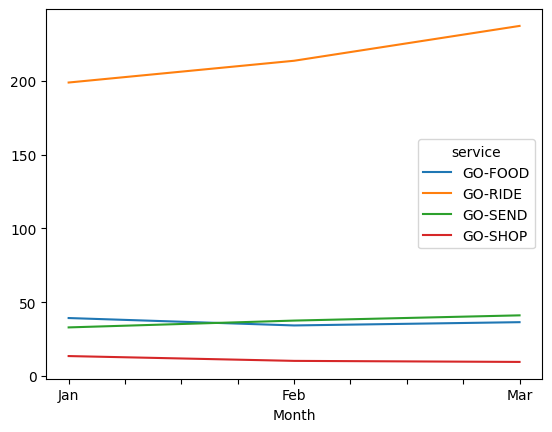

In [ ]:
print("completed rides")
print("Lets make these all data with the completed rides")
Q1_2016_df_pivot_cbv_4 = Q1_2016_df[Q1_2016_df["order_status"] == "Completed"]
Q1_2016_df_pivot_cbv_4 = Q1_2016_df_pivot_cbv_4[Q1_2016_df_pivot_cbv_4.service.isin(ninety_five_perc_gmv)]

Q1_2016_df_pivot_cbv = Q1_2016_df_pivot_cbv_4.pivot_table(index='service', columns=['Month' ], values='total_cbv', aggfunc= 'sum')
Q1_2016_df_pivot_cbv = Q1_2016_df_pivot_cbv[["Jan",	"Feb",		"Mar"]]

for cols in Q1_2016_df_pivot_cbv.columns:
  Q1_2016_df_pivot_cbv[cols]=(Q1_2016_df_pivot_cbv[cols]/1000000000)
display(Q1_2016_df_pivot_cbv)
display(Q1_2016_df_pivot_cbv.T.plot())
Q1_2016_df_pivot_cbv_4 = Q1_2016_df_pivot_cbv
Q1_2016_df_pivot_cbv_4.reset_index(inplace = True)
Q1_2016_df_pivot_cbv_4["Feb_jan_growth"] = (Q1_2016_df_pivot_cbv_4.Feb / Q1_2016_df_pivot_cbv_4.Jan -1)*100
Q1_2016_df_pivot_cbv_4["Mar_Feb_growth"] = (Q1_2016_df_pivot_cbv_4.Mar / Q1_2016_df_pivot_cbv_4.Feb -1)*100
display(Q1_2016_df_pivot_cbv_4)#import csv

from the above plot we observe that only go shop is reduced and the go ride is increased by the 11 percent

***Lets make for the cancelled rides***

,service,Jan,Feb,Mar
0,GO-BOX,5.802903,6.157340,7.377019
1,GO-CLEAN,0.116211,0.195657,0.211387
2,GO-FOOD,22.529788,11.338680,8.831043
3,GO-GLAM,0.180921,0.209656,0.213451
4,GO-KILAT,0.003162,0.011026,0.041368


Month
Jan    82020691764
Feb    85170101815
Mar    86648864582
dtype: int64


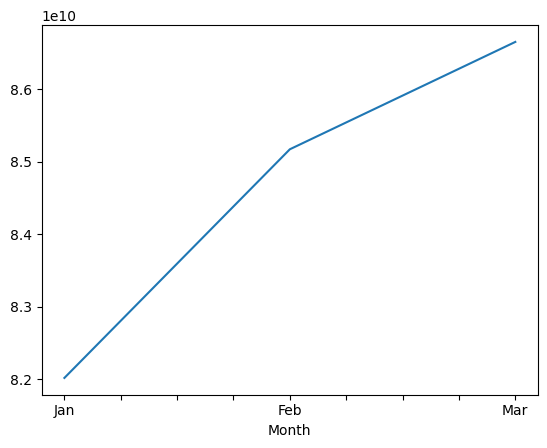

Month,Jan,Feb,Mar
0,82020691764,85170101815,86648864582


Month,Jan,Feb,Mar,Feb_jan_growth,Mar_Feb_growth
0,82020691764,85170101815,86648864582,3.839775,1.736246


,service,Jan,Feb,Mar,cummul1,cummul2,cummul3
7,GO-RIDE,50.521709,66.561393,68.080698,50.521709,66.561393,68.080698
2,GO-FOOD,22.529788,11.338680,8.831043,73.051497,77.900074,76.911742
9,GO-SHOP,11.669983,5.678150,4.483131,84.721479,83.578223,81.394873
8,GO-SEND,7.805580,8.764282,9.502860,92.527059,92.342506,90.897734


['GO-RIDE', 'GO-FOOD', 'GO-SHOP', 'GO-SEND']


In [ ]:
Q1_2016_df_pivot_cbv = Q1_2016_df[Q1_2016_df["order_status"] != "Completed"]
Q1_2016_df_pivot_cbv = Q1_2016_df_pivot_cbv.pivot_table(index='service', columns=['Month' ], values='total_cbv', aggfunc= 'sum')
Q1_2016_df_pivot_cbv = Q1_2016_df_pivot_cbv[["Jan",	"Feb",		"Mar"]]

revenue_total = pd.DataFrame()

for cols in Q1_2016_df_pivot_cbv.columns:
  revenue_total[cols]=(Q1_2016_df_pivot_cbv[cols]/Q1_2016_df_pivot_cbv[cols].sum())*100

revenue_total.reset_index(inplace = True)
display(revenue_total.head())

overall_cbv =     Q1_2016_df_pivot_cbv.sum()
print(overall_cbv)
overall_cbv.plot()
plt.show()


overall_cbv =     Q1_2016_df_pivot_cbv.sum()
overall_cbv_df = pd.DataFrame(data = overall_cbv).T
display(overall_cbv_df)

overall_cbv_df["Feb_jan_growth"] = (overall_cbv_df.Feb / overall_cbv_df.Jan -1)*100
overall_cbv_df["Mar_Feb_growth"] = (overall_cbv_df.Mar / overall_cbv_df.Feb -1)*100

display(overall_cbv_df)

revenue_total.sort_values(["Jan"], ascending=[False],inplace=True)

revenue_total.head()

revenue_total['cummul1'] = revenue_total["Jan"].cumsum()
revenue_total['cummul2'] = revenue_total["Feb"].cumsum()
revenue_total['cummul3'] = revenue_total["Mar"].cumsum()

top_95_revenue = revenue_total[revenue_total["cummul3"]<=95 ]

display(top_95_revenue)
ninety_five_perc_gmv = list(top_95_revenue.service.unique())
print(ninety_five_perc_gmv)

Loss percent as decreased from the 3.8 to 1.7 which is a good concern

In [ ]:
Q1_2016_df_can_com = Q1_2016_df[Q1_2016_df.order_status.isin(["Cancelled", "Completed"])]
Q1_2016_df_can_com = Q1_2016_df_can_com[Q1_2016_df_can_com.service.isin(ninety_five_perc_gmv)]


Q1_2016_df_pivot = Q1_2016_df_can_com.pivot_table(index='service', columns=['order_status','Month' ], values='num_orders', aggfunc= 'sum')
Q1_2016_df_pivot.fillna(0, inplace = True)

multi_tuples =[
                ('Cancelled', 'Jan'),
               ('Cancelled', 'Feb'),
            ('Cancelled', 'Mar'),
            ('Completed', 'Jan'),
            ('Completed', 'Feb'),
            ('Completed', 'Mar')]

multi_cols = pd.MultiIndex.from_tuples(multi_tuples, names=['Experiment', 'Lead Time'])

Q1_2016_df_pivot = pd.DataFrame(Q1_2016_df_pivot, columns=multi_cols)


display(Q1_2016_df_pivot.columns)
display(Q1_2016_df_pivot.head(3))

Q1_2016_df_pivot.columns = ['_'.join(col) for col in Q1_2016_df_pivot.columns.values]

display(Q1_2016_df_pivot)
#import csv

Q1_2016_df_pivot["jan_total"] = Q1_2016_df_pivot.Cancelled_Jan  + Q1_2016_df_pivot.Completed_Jan
Q1_2016_df_pivot["feb_total"] = Q1_2016_df_pivot.Cancelled_Feb  + Q1_2016_df_pivot.Completed_Feb
Q1_2016_df_pivot["mar_total"] = Q1_2016_df_pivot.Cancelled_Mar  + Q1_2016_df_pivot.Completed_Mar

Q1_2016_df_pivot[ "Cancelled_Jan_ratio"	]    =Q1_2016_df_pivot.Cancelled_Jan/Q1_2016_df_pivot.jan_total *100
Q1_2016_df_pivot[	"Cancelled_Feb_ratio"	]=Q1_2016_df_pivot.Cancelled_Feb/Q1_2016_df_pivot.feb_total *100
Q1_2016_df_pivot[	"Cancelled_Mar_ratio"	]=Q1_2016_df_pivot.Cancelled_Mar/Q1_2016_df_pivot.mar_total *100
Q1_2016_df_pivot[	"Completed_Jan_ratio"	]=Q1_2016_df_pivot.Completed_Jan/Q1_2016_df_pivot.jan_total *100
Q1_2016_df_pivot[	"Completed_Feb_ratio"	]=Q1_2016_df_pivot.Completed_Feb/Q1_2016_df_pivot.feb_total *100
Q1_2016_df_pivot[	"Completed_Mar_ratio" ]  =Q1_2016_df_pivot.Completed_Mar/Q1_2016_df_pivot.mar_total *100

Q1_2016_df_pivot_1 = Q1_2016_df_pivot[["Cancelled_Jan_ratio"
,"Cancelled_Feb_ratio"
,"Cancelled_Mar_ratio"
,"Completed_Jan_ratio"
,"Completed_Feb_ratio"
,"Completed_Mar_ratio"]]

Q1_2016_df_pivot_1

MultiIndex([('Cancelled', 'Jan'),
            ('Cancelled', 'Feb'),
            ('Cancelled', 'Mar'),
            ('Completed', 'Jan'),
            ('Completed', 'Feb'),
            ('Completed', 'Mar')],
           names=['Experiment', 'Lead Time'])

Experiment Cancelled                   Completed                    
Lead Time        Jan      Feb      Mar       Jan       Feb       Mar
service                                                             
GO-FOOD      1032510   542270   443540   2328700   2068690   2242370
GO-RIDE      1663450  1825540  1900800   9745500  10068540  10497760
GO-SEND       154620   152720   169270    899260   1037320   1124700

,Cancelled_Jan,Cancelled_Feb,Cancelled_Mar,Completed_Jan,Completed_Feb,Completed_Mar
service,,,,,,
GO-FOOD,1032510,542270,443540,2328700,2068690,2242370
GO-RIDE,1663450,1825540,1900800,9745500,10068540,10497760
GO-SEND,154620,152720,169270,899260,1037320,1124700
GO-SHOP,371510,171110,114150,555850,415850,380000


,Cancelled_Jan_ratio,Cancelled_Feb_ratio,Cancelled_Mar_ratio,Completed_Jan_ratio,Completed_Feb_ratio,Completed_Mar_ratio
service,,,,,,
GO-FOOD,30.718402,20.768989,16.513584,69.281598,79.231011,83.486416
GO-RIDE,14.580220,15.348308,15.330813,85.419780,84.651692,84.669187
GO-SEND,14.671500,12.833182,13.081447,85.328500,87.166818,86.918553
GO-SHOP,40.061033,29.151901,23.100273,59.938967,70.848099,76.899727


The cancelled artio has decreased in every service except the go ride as it is increased nearly 1 percent. There is a improvement in completed ratios which is a good concern

                  Feb        Jan        Mar
service                                    
GO-BOX       9.009901   8.757062   8.462238
GO-CLEAN    10.396040   8.380414  10.646042
GO-FOOD      9.603960  10.734463   9.372157
GO-GLAM      9.207921   9.133710   9.463148
GO-KILAT     7.326733   5.555556   7.734304
GO-MART      7.425743   7.532957   8.098271
GO-MASSAGE   9.801980   9.604520   9.918107
GO-RIDE     10.198020  11.487759   9.736124
GO-SEND      9.306931   9.981168   9.281165
GO-SHOP      8.910891   9.887006   8.735214
GO-TIX       8.811881   8.945386   8.553230


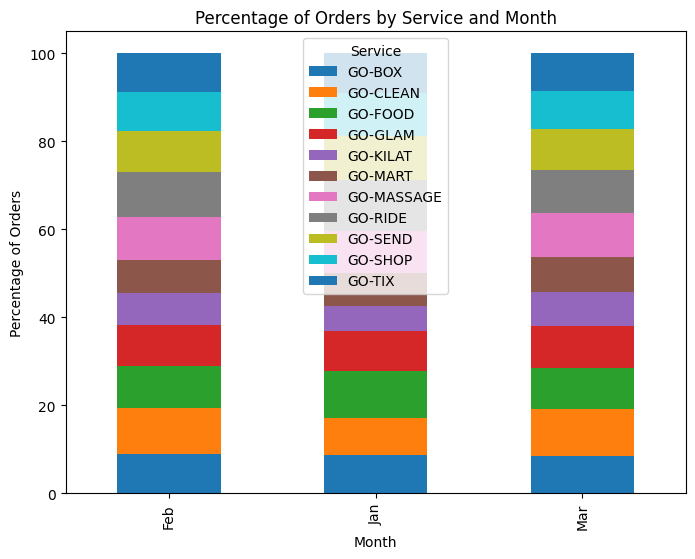

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

perc_of_cols_orders = pd.DataFrame()

for col in Q1_2016_df_pivot.columns:
    perc_of_cols_orders[col] = (Q1_2016_df_pivot[col] / Q1_2016_df_pivot[col].sum()) * 100
print(perc_of_cols_orders)
perc_of_cols_orders.T.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Percentage of Orders')
plt.title('Percentage of Orders by Service and Month')
plt.legend(title='Service')
plt.show()


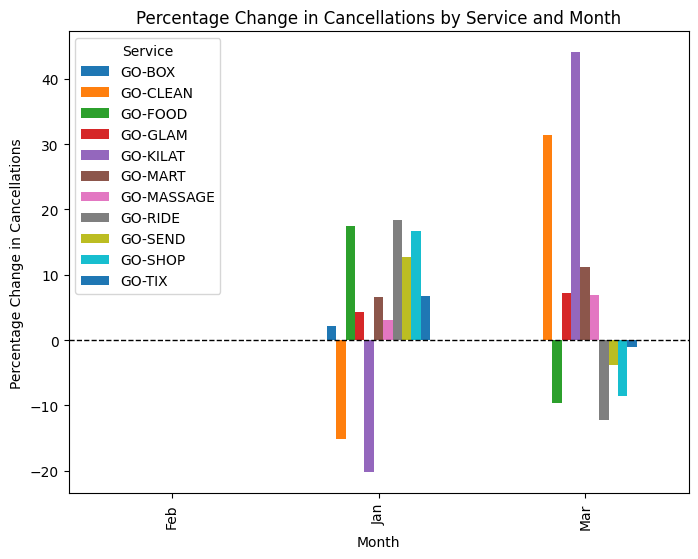

In [ ]:
cancellation_percentage_change = Q1_2016_df_pivot.pct_change(axis=1) * 100
cancellation_percentage_change.T.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Percentage Change in Cancellations')
plt.title('Percentage Change in Cancellations by Service and Month')
plt.legend(title='Service')
plt.axhline(y=0, color='k', linestyle='--', lw=1)  # Add a horizontal line at y=0 for reference (no change)
plt.show()


**ANALYSIS**

RIDE : it is the highest contributor to the revenue.the cancellation growth is detected.Reduce cancellations to perform better.


FOOD : Despite an increase in cancelled orders, GMV loss has been successfully stopped thanks to cost optimisation.
By decreasing expenses and cancellations, increase net revenue.
Encourage increased customer acquisition.

***MAXIME PROFITS BY OPTIMIZING BUDJET NEEDS***

Here is the question 2: Given the data in Table B, how will you maximize the profit if we only have a budget of IDR 40,000,000,000?. they given the growth rate targets

In [ ]:
budget_df =pd.read_csv('https://raw.githubusercontent.com/chrisdmell/Project_DataScience/working_branch/09_gojek/optimization_budge.csv')

print("Shape of the df")
display(budget_df.shape)

print("HEAD")
display(budget_df.head())

print("NULL CHECK")
display(budget_df.isnull().any().sum())

print("NULL CHECK")
display(budget_df.isnull().sum())

print("df INFO")
display(budget_df.info())

print("DESCRIBE")
display(budget_df.describe())


time_to_pandas_time = ["date"]

for cols in time_to_pandas_time:
  sales_df[cols] = pd.to_datetime(sales_df[cols])

sales_df.dtypes

sales_df['Month'] = sales_df['date'].dt.month
sales_df.head()

sales_df['Month'].drop_duplicates()

sales_df_q1 = sales_df[sales_df['Month'] !=4]
## Assumptions
sales_df_q1 = sales_df_q1[sales_df_q1["order_status"] == "Completed"]

# Q1_2016_df_pivot = Q1_2016_df.pivot_table(index='service', columns=['order_status','Month' ], values='num_orders', aggfunc= 'sum')

sales_df_q1_pivot = sales_df_q1.pivot_table(index='service', columns=['order_status'], values='total_cbv', aggfunc= 'sum')
sales_df_q1_pivot_orders = sales_df_q1.pivot_table(index='service', columns=['order_status'], values='num_orders', aggfunc= 'sum')

sales_df_q1_pivot.reset_index(inplace = True)
sales_df_q1_pivot.columns = ["Service","Q1_revenue_completed"]
sales_df_q1_pivot

sales_df_q1_pivot_orders.reset_index(inplace = True)
sales_df_q1_pivot_orders.columns = ["Service","Q1_order_completed"]

optimization_Df = pd.merge(
    sales_df_q1_pivot,
    budget_df,
    how="left",
    on="Service",

)

optimization_Df = pd.merge(
    optimization_Df,
    sales_df_q1_pivot_orders,
    how="left",
    on="Service",

)

optimization_Df.columns = ["Service",	"Q1_revenue_completed",	"Cost_per_100_inc_booking",	"max_q2_growth_rate","Q1_order_completed"]
optimization_Df.head(5)

Shape of the df


(12, 3)

HEAD


,Service,Cost per Hundred Incremental Booking Made \n (Lot Size 100),Maximum Booking Made Growth Rate in Q2
0,GO-BOX,40000000,7%
1,GO-CLEAN,15000000,10%
2,GO-FOOD,1350000,60%
3,GO-GLAM,13000000,8%
4,GO-KILAT,1600000,35%


NULL CHECK


1

NULL CHECK


Service                                                        0
Cost per Hundred Incremental Booking Made \n (Lot Size 100)    0
Maximum Booking Made Growth Rate in Q2                         1
dtype: int64

df INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Service                                                     12 non-null     object
 1   Cost per Hundred Incremental Booking Made 
 (Lot Size 100)  12 non-null     int64 
 2   Maximum Booking Made Growth Rate in Q2                      11 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


None

DESCRIBE


,Cost per Hundred Incremental Booking Made \n (Lot Size 100)
count,1.200000e+01
mean,3.341238e+09
std,1.154452e+10
min,8.000000e+02
25%,1.550000e+06
50%,2.700000e+06
75%,1.500000e+07
max,4.000000e+10


,Service,Q1_revenue_completed,Cost_per_100_inc_booking,max_q2_growth_rate,Q1_order_completed
0,GO-BOX,23991560554,40000000,7%,63760
1,GO-CLEAN,2172273740,15000000,10%,14280
2,GO-FOOD,109973139094,1350000,60%,6639760
3,GO-GLAM,1102690225,13000000,8%,7500
4,GO-KILAT,353070900,1600000,35%,16770


In [ ]:
optimization_Df["max_q2_growth_rate_upd"]   = optimization_Df['max_q2_growth_rate'].str.extract('(\d+)').astype(int)                 ## extract int from string
optimization_Df["max_growth_q2_cbv"]        = (optimization_Df.Q1_order_completed *(1+ optimization_Df.max_q2_growth_rate_upd/100))  ## Q2 max orders based on Q1 orders
optimization_Df["abs_inc_orders"]           = optimization_Df.max_growth_q2_cbv-optimization_Df.Q1_order_completed                   ## Total increase in orders
optimization_Df["cost_of_max_inc_q2_order"] = optimization_Df.abs_inc_orders * optimization_Df.Cost_per_100_inc_booking /100         ## Total Cost to get maximum growth for each serivce

display(optimization_Df)

display(budget_df[budget_df["Service"] == "Budget:"].reset_index())
budget_max = budget_df[budget_df["Service"] == "Budget:"].reset_index()
budget_max = budget_max.iloc[:,2:3].values[0][0]
print("Budget difference by")
display(budget_max-optimization_Df.cost_of_max_inc_q2_order.sum() )

,Service,Q1_revenue_completed,Cost_per_100_inc_booking,max_q2_growth_rate,Q1_order_completed,max_q2_growth_rate_upd,max_growth_q2_cbv,abs_inc_orders,cost_of_max_inc_q2_order
0,GO-BOX,23991560554,40000000,7%,63760,7,68223.2,4463.2,1.785280e+09
1,GO-CLEAN,2172273740,15000000,10%,14280,10,15708.0,1428.0,2.142000e+08
2,GO-FOOD,109973139094,1350000,60%,6639760,60,10623616.0,3983856.0,5.378206e+10
3,GO-GLAM,1102690225,13000000,8%,7500,8,8100.0,600.0,7.800000e+07
4,GO-KILAT,353070900,1600000,35%,16770,35,22639.5,5869.5,9.391200e+07
5,GO-MART,2720536000,1400000,23%,194330,23,239025.9,44695.9,6.257426e+08
6,GO-MASSAGE,7531400240,15000000,17%,41940,17,49069.8,7129.8,1.069470e+09
7,GO-RIDE,649740789880,2100000,30%,30311800,30,39405340.0,9093540.0,1.909643e+11
8,GO-SEND,111544241900,3000000,35%,3061280,35,4132728.0,1071448.0,3.214344e+10
9,GO-SHOP,33248486180,2400000,20%,1351700,20,1622040.0,270340.0,6.488160e+09


,index,Service,Cost per Hundred Incremental Booking Made \n (Lot Size 100),Maximum Booking Made Growth Rate in Q2
0,11,Budget:,40000000000,NaN


Budget difference by


-247244617204.0

Therefore 247B more budjet is required to acheive the growth targets

In [ ]:
optimization_Df["min_10_max_growth_q2_cbv"]        = (optimization_Df.Q1_order_completed *(1+ optimization_Df.max_q2_growth_rate_upd/1000))  ## atleast 10% of max if achieved, this is orders
optimization_Df["min_10_abs_inc_orders"]           = optimization_Df.min_10_max_growth_q2_cbv-optimization_Df.Q1_order_completed             ## what is the increase in orders needed to achieve 10% orders growth
optimization_Df["min_10_cost_of_max_inc_q2_order"] = optimization_Df.min_10_abs_inc_orders * optimization_Df.Cost_per_100_inc_booking /100   ## Cost associatedfor 10% increase in orders

display(budget_max-optimization_Df.min_10_cost_of_max_inc_q2_order.sum() )  ## Total budget remaining

display((budget_max-optimization_Df.min_10_cost_of_max_inc_q2_order.sum())/budget_max)  ## Budget utilization percentage


optimization_Df["perc_min_10_max_growth_q2_cbv"] =( ( optimization_Df.max_q2_growth_rate_upd/1000))  ## atleast 10% of max if achieved, 7 to percent divide by 100, 10% of this number. divide by 10, so 1000
optimization_Df["perc_max_growth_q2_cbv"]        =( ( optimization_Df.max_q2_growth_rate_upd/100))   ## Max growth to be achieved

optimization_Df["q1_aov"] = optimization_Df.Q1_revenue_completed/optimization_Df.Q1_order_completed  ## Q1 average order value
optimization_Df["order_profitability"] = 0.1  ## this is assumption that 10% will be profit

optimization_Df["a_orders_Q2"]        = (optimization_Df.Q1_order_completed *(1+ optimization_Df.perc_min_10_max_growth_q2_cbv))  ## based on 10% growth, total new orders for qc

optimization_Df["a_abs_inc_orders"]   = optimization_Df.a_orders_Q2-optimization_Df.Q1_order_completed

optimization_Df["a_Q2_costs"] = optimization_Df.Cost_per_100_inc_booking* optimization_Df.a_abs_inc_orders/100

##There is scope for improvement here, so This can be adjusted based on revenue or ranking from Q1
display(budget_max - optimization_Df.a_Q2_costs.sum())

optimization_Df#import csv

11275538279.599998

0.28188845699

11275538279.599998

,Service,Q1_revenue_completed,Cost_per_100_inc_booking,max_q2_growth_rate,Q1_order_completed,max_q2_growth_rate_upd,max_growth_q2_cbv,abs_inc_orders,cost_of_max_inc_q2_order,min_10_max_growth_q2_cbv,min_10_abs_inc_orders,min_10_cost_of_max_inc_q2_order,perc_min_10_max_growth_q2_cbv,perc_max_growth_q2_cbv,q1_aov,order_profitability,a_orders_Q2,a_abs_inc_orders,a_Q2_costs
0,GO-BOX,23991560554,40000000,7%,63760,7,68223.2,4463.2,1.785280e+09,64206.32,446.32,1.785280e+08,0.007,0.07,376279.180583,0.1,64206.32,446.32,1.785280e+08
1,GO-CLEAN,2172273740,15000000,10%,14280,10,15708.0,1428.0,2.142000e+08,14422.80,142.80,2.142000e+07,0.010,0.10,152120.009804,0.1,14422.80,142.80,2.142000e+07
2,GO-FOOD,109973139094,1350000,60%,6639760,60,10623616.0,3983856.0,5.378206e+10,7038145.60,398385.60,5.378206e+09,0.060,0.60,16562.818399,0.1,7038145.60,398385.60,5.378206e+09
3,GO-GLAM,1102690225,13000000,8%,7500,8,8100.0,600.0,7.800000e+07,7560.00,60.00,7.800000e+06,0.008,0.08,147025.363333,0.1,7560.00,60.00,7.800000e+06
4,GO-KILAT,353070900,1600000,35%,16770,35,22639.5,5869.5,9.391200e+07,17356.95,586.95,9.391200e+06,0.035,0.35,21053.720930,0.1,17356.95,586.95,9.391200e+06
5,GO-MART,2720536000,1400000,23%,194330,23,239025.9,44695.9,6.257426e+08,198799.59,4469.59,6.257426e+07,0.023,0.23,13999.567746,0.1,198799.59,4469.59,6.257426e+07
6,GO-MASSAGE,7531400240,15000000,17%,41940,17,49069.8,7129.8,1.069470e+09,42652.98,712.98,1.069470e+08,0.017,0.17,179575.589890,0.1,42652.98,712.98,1.069470e+08
7,GO-RIDE,649740789880,2100000,30%,30311800,30,39405340.0,9093540.0,1.909643e+11,31221154.00,909354.00,1.909643e+10,0.030,0.30,21435.242707,0.1,31221154.00,909354.00,1.909643e+10
8,GO-SEND,111544241900,3000000,35%,3061280,35,4132728.0,1071448.0,3.214344e+10,3168424.80,107144.80,3.214344e+09,0.035,0.35,36437.124961,0.1,3168424.80,107144.80,3.214344e+09
9,GO-SHOP,33248486180,2400000,20%,1351700,20,1622040.0,270340.0,6.488160e+09,1378734.00,27034.00,6.488160e+08,0.020,0.20,24597.533610,0.1,1378734.00,27034.00,6.488160e+08


Assumptions used here:

Every service has a profit of 10%.
AOV(revenue/orders) will remain the same as in Q1.

**PRE OPTIMIZATION DATA SET :**

In [ ]:
## Data prep for pulp optimization
perc_all_df = pd.DataFrame(data=list(range(1, optimization_Df["max_q2_growth_rate_upd"].max() + 1)), columns=["growth_perc"])
## create a list of all percentage growth, from 1 to max to growth expected, this is to create simulation for optimization
display(perc_all_df.head(1))

optimization_Df_2 = pd.merge(optimization_Df, perc_all_df, how="cross")  ## cross join with opti DF

## Filter and keeping all percentages up to maximum for each service
## Minimum percentage kept is 1
optimization_Df_2["filter_flag"] = np.where(optimization_Df_2["max_q2_growth_rate_upd"] >= optimization_Df_2["growth_perc"], 1, 0)
optimization_Df_2["abs_profit"] = optimization_Df_2["q1_aov"] * optimization_Df_2["order_profitability"]
optimization_Df_3 = optimization_Df_2[optimization_Df_2["filter_flag"] == 1]

display(optimization_Df_3.head(1))
display(optimization_Df_3.columns)

## Filter columns needed
optimization_Df_4 = optimization_Df_3[[
    'Service',                       ## services offered
    'Cost_per_100_inc_booking',      ## cost of additional 100 orders
    'Q1_order_completed',            ## to calculate q2 growth based on q1 orders
    'perc_min_10_max_growth_q2_cbv', ## minimum growth percent needed
    'perc_max_growth_q2_cbv',        ## max growth percent allowed
    'abs_profit',                    ## profit per order
    'growth_perc'                    ## to simulate growth percent across
]].copy()  # Make a copy to avoid the SettingWithCopyWarning

display(optimization_Df_4.head(2))

optimization_Df_4.loc[:, "orders_Q2"] = optimization_Df_4["Q1_order_completed"] * (1 + optimization_Df_4["growth_perc"] / 100)  ## based on growth, total new orders for Q2
optimization_Df_4.loc[:, "abs_inc_orders"] = optimization_Df_4["orders_Q2"] - optimization_Df_4["Q1_order_completed"]
optimization_Df_4.loc[:, "profit_Q2_cbv"] = optimization_Df_4["orders_Q2"] * optimization_Df_4["abs_profit"]
optimization_Df_4.loc[:, "growth_perc"] = optimization_Df_4["growth_perc"] / 100
optimization_Df_4.loc[:, "Q2_costs"] = optimization_Df_4["Cost_per_100_inc_booking"] * optimization_Df_4["abs_inc_orders"] / 100

display(optimization_Df_4.head())

optimization_Df_5 = optimization_Df_4[[
    'Service',                       ## services offered
    'Q2_costs',                      ## cost total for the growth expected
    'perc_min_10_max_growth_q2_cbv', ## minimum growth percent needed
    'perc_max_growth_q2_cbv',        ## max growth percent allowed
    'profit_Q2_cbv',                 ## total profit at the assumed order_profitability rate
    'growth_perc'                    ## to simulate growth percent across
]]

display(optimization_Df_5.head(10))
display(optimization_Df_5.shape)


,growth_perc
0,1


,Service,Q1_revenue_completed,Cost_per_100_inc_booking,max_q2_growth_rate,Q1_order_completed,max_q2_growth_rate_upd,max_growth_q2_cbv,abs_inc_orders,cost_of_max_inc_q2_order,min_10_max_growth_q2_cbv,...,perc_min_10_max_growth_q2_cbv,perc_max_growth_q2_cbv,q1_aov,order_profitability,a_orders_Q2,a_abs_inc_orders,a_Q2_costs,growth_perc,filter_flag,abs_profit
0,GO-BOX,23991560554,40000000,7%,63760,7,68223.2,4463.2,1.785280e+09,64206.32,...,0.007,0.07,376279.180583,0.1,64206.32,446.32,1.785280e+08,1,1,37627.918058


Index(['Service', 'Q1_revenue_completed', 'Cost_per_100_inc_booking',
       'max_q2_growth_rate', 'Q1_order_completed', 'max_q2_growth_rate_upd',
       'max_growth_q2_cbv', 'abs_inc_orders', 'cost_of_max_inc_q2_order',
       'min_10_max_growth_q2_cbv', 'min_10_abs_inc_orders',
       'min_10_cost_of_max_inc_q2_order', 'perc_min_10_max_growth_q2_cbv',
       'perc_max_growth_q2_cbv', 'q1_aov', 'order_profitability',
       'a_orders_Q2', 'a_abs_inc_orders', 'a_Q2_costs', 'growth_perc',
       'filter_flag', 'abs_profit'],
      dtype='object')

,Service,Cost_per_100_inc_booking,Q1_order_completed,perc_min_10_max_growth_q2_cbv,perc_max_growth_q2_cbv,abs_profit,growth_perc
0,GO-BOX,40000000,63760,0.007,0.07,37627.918058,1
1,GO-BOX,40000000,63760,0.007,0.07,37627.918058,2


,Service,Cost_per_100_inc_booking,Q1_order_completed,perc_min_10_max_growth_q2_cbv,perc_max_growth_q2_cbv,abs_profit,growth_perc,orders_Q2,abs_inc_orders,profit_Q2_cbv,Q2_costs
0,GO-BOX,40000000,63760,0.007,0.07,37627.918058,0.01,64397.6,637.6,2.423148e+09,2.550400e+08
1,GO-BOX,40000000,63760,0.007,0.07,37627.918058,0.02,65035.2,1275.2,2.447139e+09,5.100800e+08
2,GO-BOX,40000000,63760,0.007,0.07,37627.918058,0.03,65672.8,1912.8,2.471131e+09,7.651200e+08
3,GO-BOX,40000000,63760,0.007,0.07,37627.918058,0.04,66310.4,2550.4,2.495122e+09,1.020160e+09
4,GO-BOX,40000000,63760,0.007,0.07,37627.918058,0.05,66948.0,3188.0,2.519114e+09,1.275200e+09


,Service,Q2_costs,perc_min_10_max_growth_q2_cbv,perc_max_growth_q2_cbv,profit_Q2_cbv,growth_perc
0,GO-BOX,2.550400e+08,0.007,0.07,2.423148e+09,0.01
1,GO-BOX,5.100800e+08,0.007,0.07,2.447139e+09,0.02
2,GO-BOX,7.651200e+08,0.007,0.07,2.471131e+09,0.03
3,GO-BOX,1.020160e+09,0.007,0.07,2.495122e+09,0.04
4,GO-BOX,1.275200e+09,0.007,0.07,2.519114e+09,0.05
5,GO-BOX,1.530240e+09,0.007,0.07,2.543105e+09,0.06
6,GO-BOX,1.785280e+09,0.007,0.07,2.567097e+09,0.07
60,GO-CLEAN,2.142000e+07,0.010,0.10,2.193996e+08,0.01
61,GO-CLEAN,4.284000e+07,0.010,0.10,2.215719e+08,0.02
62,GO-CLEAN,6.426000e+07,0.010,0.10,2.237442e+08,0.03


(280, 6)

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 50.7 MB/s eta 0:00:00


In [ ]:
from pulp import *

## Define the optimization problem
prob = LpProblem("growth_maximize", LpMaximize)

optimization_Df_5.reset_index(drop=True, inplace=True)
markdowns = list(optimization_Df_5['growth_perc'].unique())
cost_v = list(optimization_Df_5['Q2_costs'])
perc_min_10_max_growth_q2_cbv = list(optimization_Df_5['perc_min_10_max_growth_q2_cbv'])
growth_perc = list(optimization_Df_5['growth_perc'])

## Define LP variables
low = LpVariable.dicts("l_", perc_min_10_max_growth_q2_cbv, lowBound=0, cat="Continuous")
growth = LpVariable.dicts("g_", growth_perc, lowBound=0, cat="Continuous")
delta = LpVariable.dicts("d", markdowns, 0, 1, LpBinary)
x = LpVariable.dicts("x", range(0, len(optimization_Df_5)), 0, 1, LpBinary)

## Objective function - Maximize profit
prob += lpSum(x[i] * optimization_Df_5.loc[i, 'profit_Q2_cbv'] for i in range(len(optimization_Df_5)))

## Constraint: One unique growth percentage for each service
for i in optimization_Df_5['Service'].unique():
    prob += lpSum(x[idx] for idx in optimization_Df_5[optimization_Df_5['Service'] == i].index) == 1

## Constraint: Do not exceed total budget
prob += lpSum(x[i] * optimization_Df_5.loc[i, 'Q2_costs'] for i in range(len(optimization_Df_5))) <= budget_max

## Constraint: Minimum should be achieved
for i in range(len(optimization_Df_5)):
    prob += lpSum(x[i] * optimization_Df_5.loc[i, 'growth_perc']) >= lpSum(x[i] * optimization_Df_5.loc[i, 'perc_min_10_max_growth_q2_cbv'])

prob.writeLP('markdown_problem')  ## Write Problem name
prob.solve()  ## Solve Problem
display(LpStatus[prob.status])  ## Problem status - Optimal, if the problem solved successfully
display(value(prob.objective))  ## Objective, in this case, the maximized profit with available budget - 98731060158.842 @ 10% profit per order


'Optimal'

98731060158.842

In [ ]:
var_name = []
var_values = []
for variable in prob.variables():
    if 'x' in variable.name:
        var_name.append(variable.name)
        var_values.append(variable.varValue)

results = pd.DataFrame()

results['variable_name'] = var_name
results['variable_values'] = var_values
results['variable_name_1'] = results['variable_name'].apply(lambda x: x.split('_')[0])
results['variable_name_2'] = results['variable_name'].apply(lambda x: int(x.split('_')[1]))
results.sort_values(by='variable_name_2', inplace=True)
results.drop(columns=['variable_name_1', 'variable_name_2'], inplace=True)
results.reset_index(drop=True, inplace=True)

optimization_Df_5.loc[:, 'variable_name'] = results['variable_name'].copy()
optimization_Df_5.loc[:, 'variable_values'] = results['variable_values'].copy()
optimization_Df_5['variable_values'] = optimization_Df_5['variable_values'].astype(int)

# with no budget constraint
optimization_Df_10 = optimization_Df_5[optimization_Df_5['variable_values'] == 1].copy()
optimization_Df_10["flag"] = np.where(optimization_Df_10.growth_perc >= optimization_Df_10.perc_min_10_max_growth_q2_cbv, 1, 0)

display(optimization_Df_10)

display(budget_max - optimization_Df_10['Q2_costs'].sum())
display(optimization_Df_10['Q2_costs'].sum())


<ipython-input-57-d8581117799f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimization_Df_5.loc[:, 'variable_name'] = results['variable_name'].copy()
<ipython-input-57-d8581117799f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimization_Df_5.loc[:, 'variable_values'] = results['variable_values'].copy()
<ipython-input-57-d8581117799f>:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

,Service,Q2_costs,perc_min_10_max_growth_q2_cbv,perc_max_growth_q2_cbv,profit_Q2_cbv,growth_perc,variable_name,variable_values,flag
0,GO-BOX,2.550400e+08,0.007,0.07,2.423148e+09,0.01,x_0,1,1
7,GO-CLEAN,2.142000e+07,0.010,0.10,2.193996e+08,0.01,x_7,1,1
33,GO-FOOD,1.523825e+10,0.060,0.60,1.286686e+10,0.17,x_33,1,1
77,GO-GLAM,9.750000e+06,0.008,0.08,1.113717e+08,0.01,x_77,1,1
119,GO-KILAT,9.391200e+07,0.035,0.35,4.766457e+07,0.35,x_119,1,1
122,GO-MART,8.161860e+07,0.023,0.23,2.802152e+08,0.03,x_122,1,1
156,GO-MASSAGE,8.807400e+08,0.017,0.17,8.585796e+08,0.14,x_156,1,1
162,GO-RIDE,1.909643e+10,0.030,0.30,6.692330e+10,0.03,x_162,1,1
193,GO-SEND,3.673536e+09,0.035,0.35,1.160060e+10,0.04,x_193,1,1
226,GO-SHOP,6.488160e+08,0.020,0.20,3.391346e+09,0.02,x_226,1,1


467596.0

39999532404.0

The maximum growth rate for respective services is in the chart above. For Box it’s 1%, for Clean it’s 1%, for Food it’s 17%, etc.
The total cash burn is – 39999532404.0
Underutilized budget – 467596.0
Maximized profit – 98731060158.0